In [1]:
# Dependencies
from matplotlib import pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import numpy as np
import pandas as pd
import requests
import json
import os
import time


In [2]:
# loading cites data
file_to_load = "GBvideos.csv"

# Read city File and store into data frame
GB_data = pd.read_csv(file_to_load)

#showing shape + data frame preview
print(GB_data.shape)
GB_data.head()

(38916, 16)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [3]:
#accessing json file
file = open("GB_category_id.json")
GB_json = json.load(file)

In [4]:

#changing cat_id from number to str
GB_data["category_id"] = GB_data["category_id"].astype(str)

#looping through json file to replace cat_id with category name
for x in range(len(GB_json['items'])):
    id_number = GB_json["items"][x]["id"]
    category_name = GB_json["items"][x]["snippet"]["title"]
    GB_data["category_id"] = GB_data["category_id"].replace({f"{id_number}": f"{category_name}"})

#changing cat 29 to its proper name
GB_data["category_id"] = GB_data["category_id"].replace({"29": "Nonprofits & Activism"})
# preview new data frame
GB_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,Howto & Style,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,Entertainment,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,Sports,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,News & Politics,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [5]:
# Extracting hr video was published add to df and bin    

#creating empty list to hold hrs 
pb_hr =[]

#looping through the df 
for i in GB_data['publish_time']:
    pbt = int(i[11:13])
    pb_hr.append(pbt)
    
#adding a new column to df
GB_data['publish_hr(24hrs)'] = pb_hr

# previewing df 
GB_data.head()
    
    

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_hr(24hrs)
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,Howto & Style,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,7
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,Entertainment,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,6
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,17
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,Sports,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,2
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,News & Politics,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,1


In [6]:
#creating bins and bin groups
bins = [0, 6, 11, 16, 19, 20]
group_names = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']

# using cut fucntion to bin pub hr into groups
GB_data['Publishing_Time_of_Day'] = pd.cut(GB_data['publish_hr(24hrs)'], bins, 
                                           labels=group_names, include_lowest=True)
#previewing data
GB_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_hr(24hrs),Publishing_Time_of_Day
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,Howto & Style,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,7,Morning
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,Entertainment,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,6,Early Morning
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,17,Evening
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,Sports,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,2,Early Morning
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,News & Politics,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,1,Early Morning


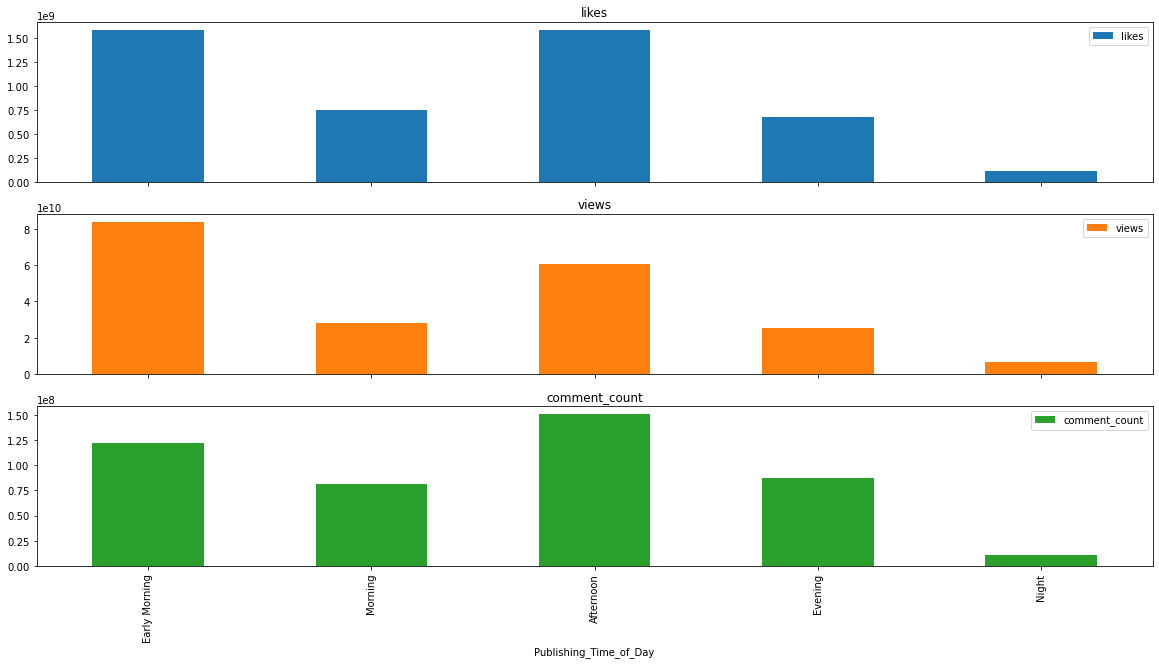

<Figure size 432x288 with 0 Axes>

In [106]:
#Graph of the best times to genrate engament

#grouping data by bins
btod_df = GB_data[['Publishing_Time_of_Day', 'likes', 'views',
                   'comment_count']].groupby('Publishing_Time_of_Day').sum()


#using the above df to plot bar chart 
btod_df_plot = btod_df.plot(subplots=True,kind='bar', figsize=(20,10))


# showing the chart + adjusting layout to tight layout
plt.show()
plt.tight_layout()

In [15]:
#group by to view top categorys
GB_cat_count = GB_data[['video_id','category_id']].groupby('category_id').count()
#resetting index
GB_cat_count.reset_index(inplace=True)
#reset columns
GB_cat_count.columns=['category','count']
# sorting values by count
GB_cat_count.sort_values('count', ascending=False, inplace=True)
#resetting index
GB_cat_count.reset_index(drop=True,inplace=True)
# showing df 
GB_cat_count

,category,count
0,Music,13754
1,Entertainment,9124
2,People & Blogs,2926
3,Film & Animation,2577
4,Howto & Style,1928
5,Sports,1907
6,Comedy,1828
7,Gaming,1788
8,News & Politics,1225
9,Pets & Animals,534


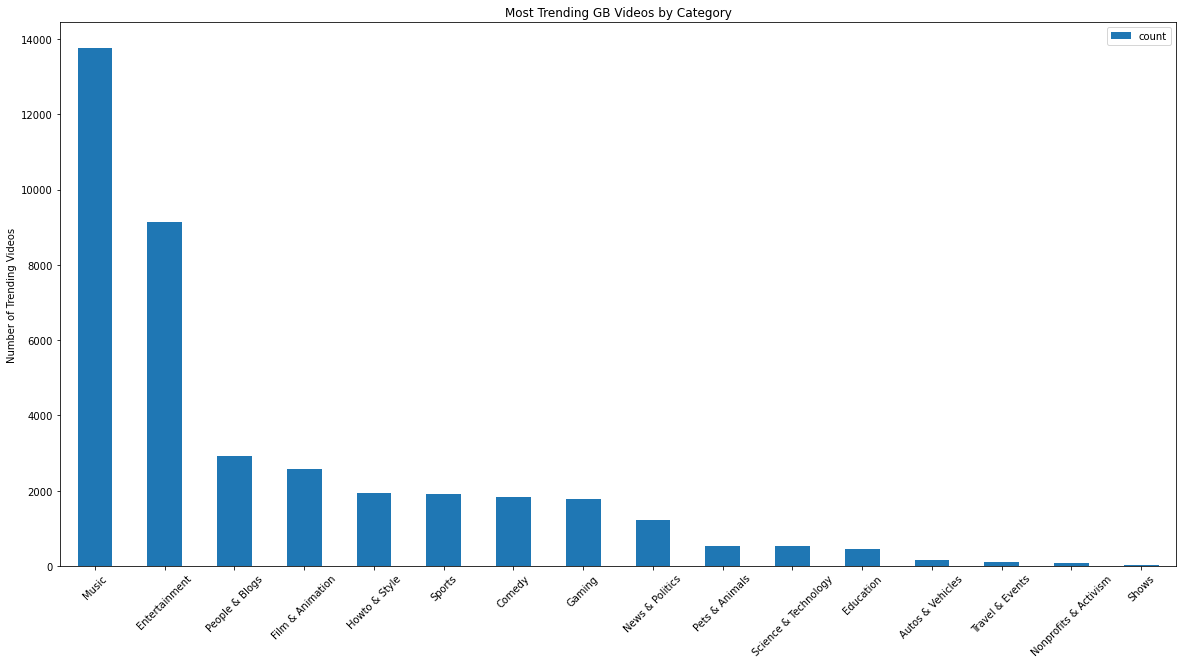

<Figure size 432x288 with 0 Axes>

In [110]:
#Graph of the most poular categories

#using the above df to plot bar chart 
GB_cat_df_plot = GB_cat_count[['category', 'count']].plot(kind='bar',ylabel='Number of Trending Videos', figsize=(20,10), title=('Most Trending GB Videos by Category'))

#labeling x axis
GB_cat_df_plot.set_xticklabels(GB_cat_count['category'],rotation=45)

# showing the chart + adjusting layout to tight layout
plt.show()
plt.tight_layout()

In [44]:
# top channels by
#group by to view top categorys
GB_chann_count = GB_data[['views','channel_title']].groupby('channel_title').agg(['count','sum'])

#resetting index
GB_chann_count.reset_index(inplace=True)
# #reset columns
GB_chann_count.columns=['channel','Cnt Of Trending Videos', 'views']
# # sorting values by count
GB_chann_count.sort_values('Cnt Of Trending Videos', ascending=False, inplace=True)
# #resetting index
GB_chann_count.reset_index(drop=True,inplace=True)
# # showing df 
top10_chann = GB_chann_count.nlargest(10, 'Cnt Of Trending Videos')

top10_chann

,channel,Cnt Of Trending Videos,views
0,The Tonight Show Starring Jimmy Fallon,208,447390019
1,Jimmy Kimmel Live,207,398235069
2,TheEllenShow,207,351577266
3,Saturday Night Live,206,594799179
4,WWE,205,587090246
5,The Late Late Show with James Corden,202,447221458
6,Late Night with Seth Meyers,194,324832280
7,Breakfast Club Power 105.1 FM,193,245849283
8,The Late Show with Stephen Colbert,189,172136056
9,Netflix,187,404422224


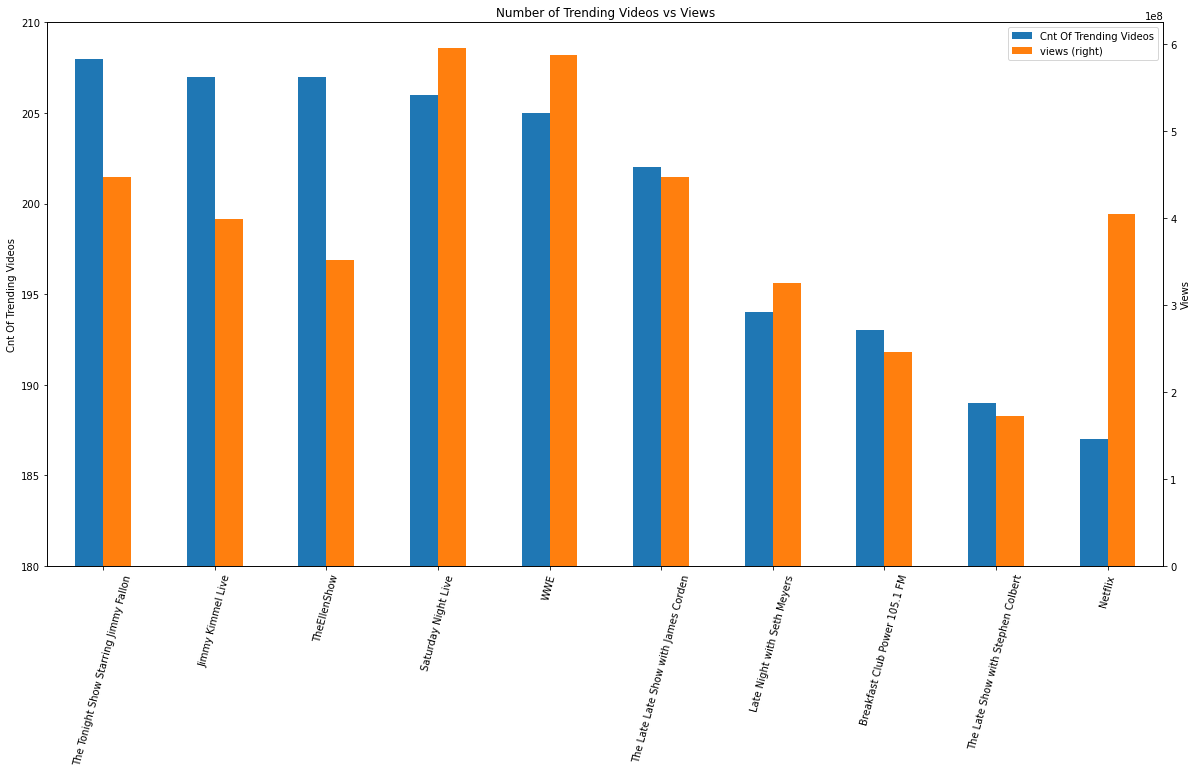

<Figure size 432x288 with 0 Axes>

In [104]:
#Graph of the most poular top 10 channels vs views of channels

#using the above df to plot bar chart 
top10_chann_plot = top10_chann.plot(kind='bar',secondary_y='views', ylabel='Cnt Of Trending Videos', 
                                    figsize=(20,10),title =('Number of Trending Videos vs Views'))

# setting min and max for video cnt y axis
top10_chann_plot.set_ylim(180, 210)

#labeling second y axis
plt.ylabel("Views")


#labeling x axis
top10_chann_plot.set_xticklabels(top10_chann['channel'],rotation=75)

# showing the chart + adjusting layout to tight layout
plt.show()
plt.tight_layout()

In [17]:
#Create a new df based on views
GB_views_df = pd.DataFrame(GB_data, columns=["trending_date", "views", "likes", "dislikes", "comment_count"])

#preview data
print(GB_views_df.shape)
GB_views_df.head()

(38916, 5)


,trending_date,views,likes,dislikes,comment_count
0,17.14.11,7224515,55681,10247,9479
1,17.14.11,1053632,25561,2294,2757
2,17.14.11,17158579,787420,43420,125882
3,17.14.11,27833,193,12,37
4,17.14.11,9815,30,2,30


In [18]:
#exlporing data for plotting
GB_views_df.describe()

,views,likes,dislikes,comment_count
count,3.891600e+04,3.891600e+04,3.891600e+04,3.891600e+04
mean,5.911944e+06,1.345196e+05,7.612560e+03,1.308835e+04
std,1.900121e+07,3.499893e+05,5.095683e+04,5.066740e+04
min,8.510000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.515272e+05,5.897000e+03,2.000000e+02,6.790000e+02
50%,9.818890e+05,2.518250e+04,8.210000e+02,2.478000e+03
75%,3.683628e+06,1.140892e+05,3.357500e+03,9.241500e+03
max,4.245389e+08,5.613827e+06,1.944971e+06,1.626501e+06


The rvalue is: 0.79586151518415


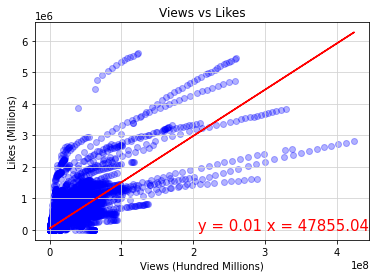

In [21]:
#setting x and y values
x = GB_views_df['views']
y = GB_views_df["likes"]

#Calculating regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)

#Calc regression line to plot on chart
regress_values = x * slope + intercept
line_eq = f' y = {round(slope,2)} x = {round(intercept,2)}' 

#plotting scatter + regression line + adding annotation to chart
plt.scatter(x, y, marker='o',color="blue",alpha=.3)
plt.plot(x, regress_values, 'red')
plt.annotate(line_eq,(2e8,20),fontsize=15,color="red")

#Adjusting x axis
# plt.xlim(0,4.5e8)
# plt.ylim(0,4.6e6)

# plotting title labels + printing corelation
plt.title("Views vs Likes")
plt.xlabel("Views (Hundred Millions)")
plt.ylabel("Likes (Millions)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f'The rvalue is: {rvalue}')

The rvalue is: 0.3924069757807083


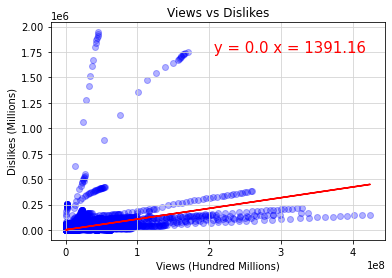

In [22]:
#setting x and y values
x = GB_views_df['views']
y = GB_views_df["dislikes"]

#Calculating regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)

#Calc regression line to plot on chart
regress_values = x * slope + intercept
line_eq = f' y = {round(slope,2)} x = {round(intercept,2)}' 

#plotting scatter + regression line + adding annotation to chart
plt.scatter(x, y, marker='o',color="blue",alpha=.3)
plt.plot(x, regress_values, 'red')
plt.annotate(line_eq,(2e8,1.75e6),fontsize=15,color="red")

#Adjusting x axis
# plt.xlim(0,4.5e8)
# plt.ylim(0,4.6e6)

# plotting title labels + printing corelation
plt.title("Views vs Dislikes")
plt.xlabel("Views (Hundred Millions)")
plt.ylabel("Dislikes (Millions)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f'The rvalue is: {rvalue}')

The rvalue is: 0.4467461803490577


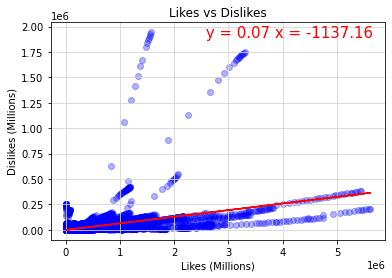

In [14]:
#Comparing likes vs dislikes

#setting x and y values
x = GB_views_df['likes']
y = GB_views_df["dislikes"]

#Calculating regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)

#Calc regression line to plot on chart
regress_values = x * slope + intercept
line_eq = f' y = {round(slope,2)} x = {round(intercept,2)}' 

#plotting scatter + regression line + adding annotation to chart
plt.scatter(x, y, marker='o',color="blue",alpha=.3)
plt.plot(x, regress_values, 'red')
plt.annotate(line_eq,(2.5e6,1.9e6),fontsize=15,color="red")

#Adjusting x axis
# plt.xlim(0,4.5e8)
# plt.ylim(0,4.6e6)

# plotting title labels + printing corelation
plt.title("Likes vs Dislikes")
plt.xlabel("Likes (Millions)")
plt.ylabel("Dislikes (Millions)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f'The rvalue is: {rvalue}')

The rvalue is: 0.4668992083501953


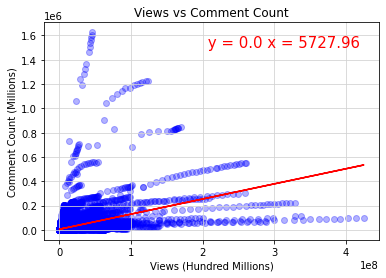

In [17]:
#Comparing Views vs Comment count

#setting x and y values
x = GB_views_df['views']
y = GB_views_df["comment_count"]

#Calculating regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)

#Calc regression line to plot on chart
regress_values = x * slope + intercept
line_eq = f' y = {round(slope,2)} x = {round(intercept,2)}' 

#plotting scatter + regression line + adding annotation to chart
plt.scatter(x, y, marker='o',color="blue",alpha=.3)
plt.plot(x, regress_values, 'red')
plt.annotate(line_eq,(2e8,1.5e6),fontsize=15,color="red")

#Adjusting x axis
# plt.xlim(0,4.5e8)
# plt.ylim(0,4.6e6)

# plotting title labels + printing corelation
plt.title("Views vs Comment Count")
plt.xlabel("Views (Hundred Millions)")
plt.ylabel("Comment Count (Millions)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
print(f'The rvalue is: {rvalue}')

In [23]:
#group by weather videos removed or not
rm_df = GB_data[['video_error_or_removed'
                 ,'dislikes']].groupby('video_error_or_removed').agg(['sum','count'])

#resetting index
rm_df.reset_index(inplace=True)

#setting column names
rm_df.columns=['Videos Removed', 'Total Dislikes', 'Cnt of Videos Removed']

#adding column showing the avg number of dislikes per video
rm_df['Avg Dislikes Per Video'] = round(rm_df['Total Dislikes']/rm_df['Cnt of Videos Removed'],2)

#showing df
rm_df

,Videos Removed,Total Dislikes,Cnt of Videos Removed,Avg Dislikes Per Video
0,False,294768878,38847,7587.94
1,True,1481506,69,21471.10


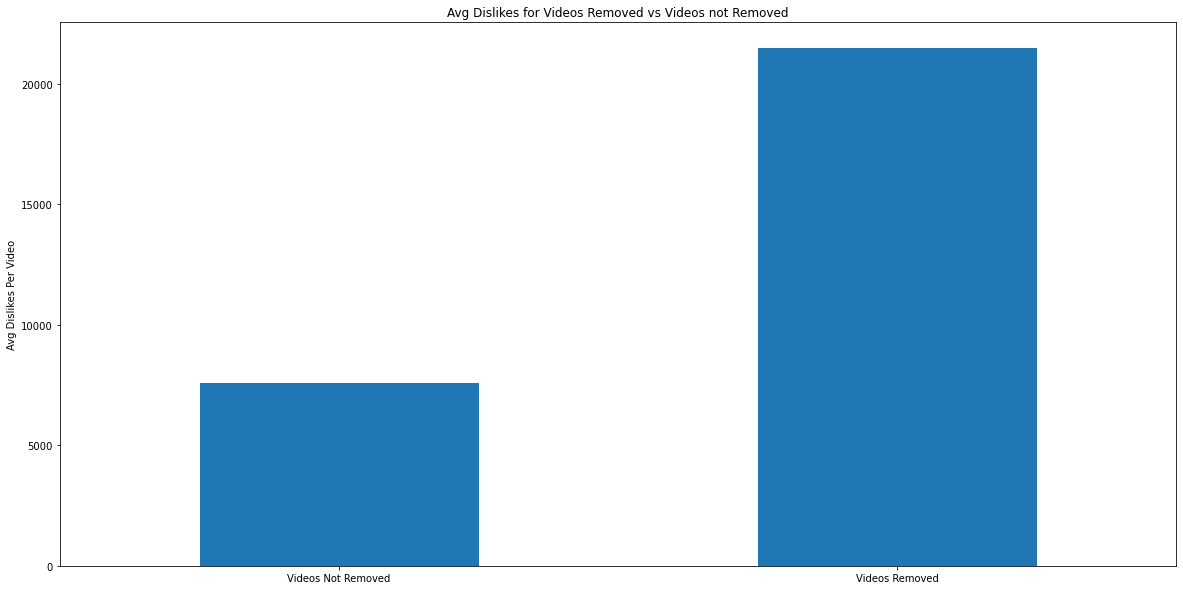

<Figure size 432x288 with 0 Axes>

In [26]:
#Graph of Avg dislikes for videos removed vs Videos not removed

#using the above df to plot bar chart 
rm_df_plot = rm_df['Avg Dislikes Per Video'].plot(kind='bar', figsize=(20,10), title =('Avg Dislikes for Videos Removed vs Videos not Removed'))

#labeling x axis
rm_df_plot.set_xticklabels(['Videos Not Removed','Videos Removed'],rotation=360)
plt.ylabel("Avg Dislikes Per Video")


# showing the chart + adjusting layout to tight layout
plt.show()
plt.tight_layout()
